In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

ModuleNotFoundError: No module named 'quandl'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Dataset/NSE-TATAGLOBAL11.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


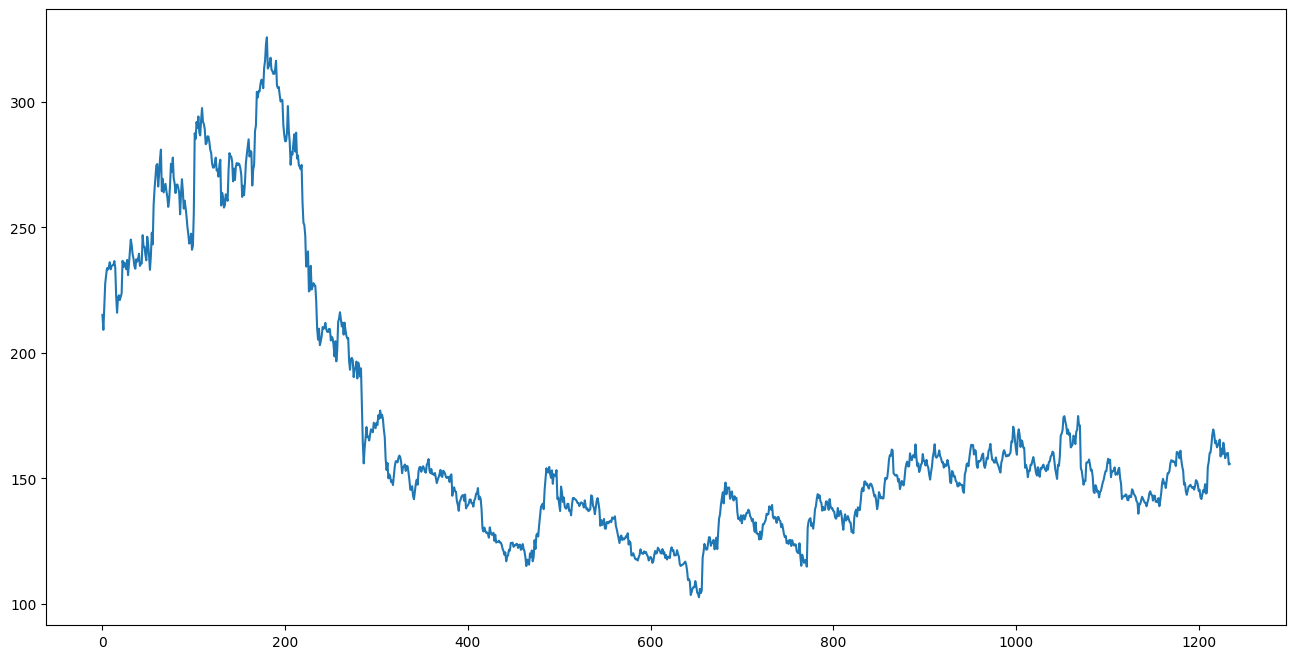

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price')

- Classification Problem : Buy(+1) or sell (-1 the stock)

In [ ]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df = df.dropna()

- Input Features to predict whether customer should buy or sell the stock

In [ ]:
X = df[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
0,-7.15,15.40
1,7.80,12.70
2,5.30,11.65
3,2.40,11.75
4,3.65,13.55


- Intention is to store +1 for the buy signal and -1 for the sell signal. The target variable is 'Y' for classification task.

In [ ]:
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

In [ ]:
Y

array([-1,  1,  1, ..., -1,  1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

- Implementation of KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

In [ ]:
# fit the model
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [ ]:
# Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

In [ ]:
print('Train data Accuracy: %.2f' %accuracy_train)
print('Test data Accuracy: %.2f' %accuracy_test)

Train data Accuracy: 0.88
Test data Accuracy: 0.85


In [ ]:
predictions_classification = model.predict(X_test)

In [ ]:
actual_predicted_data = pd.DataFrame({'Actual Class':y_test, 'Predicted Class':predictions_classification})

In [ ]:
actual_predicted_data.head()

,Actual Class,Predicted Class
0,-1,-1
1,-1,-1
2,1,1
3,-1,-1
4,-1,-1


- Regression Problem : KNN

In [ ]:
y = df['Close']

In [ ]:
y

,Close
0,215.15
1,209.20
2,218.20
3,227.60
4,230.90
...,...
1230,159.45
1231,160.05
1232,160.15
1233,155.55


- Implementation of KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

In [ ]:
# fit the model and make predictions
model_reg.fit(X_train_reg, y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [ ]:
print(predictions)

[149.86333333 181.47333333 169.83333333 136.74333333 221.48666667
 141.87333333 231.09333333 142.58666667 135.95333333 237.20333333
 236.22333333 138.51333333 156.98       152.65333333 210.01
 212.61666667 207.39333333 215.80333333 148.40666667 149.53
 224.06666667 135.12666667 137.65       136.99       140.79333333
 138.07333333 147.45333333 133.83333333 138.52       137.80666667
 163.92666667 139.44333333 182.9        231.47       141.18
 157.4        146.11       240.35666667 147.38333333 141.74666667
 132.14       136.01       236.42666667 146.89333333 141.93333333
 140.43       141.6        148.97666667 223.09333333 140.40666667
 194.9        191.25       171.40333333 160.05       143.47666667
 170.21333333 171.56333333 137.96333333 143.39666667 138.84333333
 167.89666667 144.64666667 189.09       139.36333333 138.01
 149.82       144.93666667 241.88       155.18       140.61333333
 144.72333333 205.55666667 141.36666667 132.64333333 140.07666667
 237.77333333 148.38       164.773

In [ ]:
# rmse
rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rmse

169.23087236594975

In [ ]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})

In [ ]:
valid.head(10)

,Actual Close,Predicted Close value
1083,153.45,149.863333
18,222.95,181.473333
1099,152.95,169.833333
818,132.60,136.743333
184,317.60,221.486667
608,122.40,141.873333
1213,160.35,231.093333
717,128.00,142.586667
1137,141.20,135.953333
1009,162.20,237.203333
